<a href="https://colab.research.google.com/github/aleksandrabliznyuchenko/CompLing_2020/blob/main/hw_03/hw_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Скачиваем и распаковываем архивные данные

In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!gunzip aclImdb_v1.tar.gz
!tar -xvf aclImdb_v1.tar

Собираем данные в датафреймы, делим на тренировочную и тестовую выборки

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
train_texts, test_texts = [],[]
train_eval, test_eval = [],[]
train_label, test_label = [], []

for file in os.listdir('aclImdb/train/pos'):
  with open(os.path.join('aclImdb/train/pos', file)) as f:
    train_texts.append(f.read())
    train_eval.append(1)
    train_label.append('POS')
for file in os.listdir('aclImdb/train/neg'):
  with open(os.path.join('aclImdb/train/neg', file)) as f:
    train_texts.append(f.read())
    train_eval.append(0)
    train_label.append('NEG')

for file in os.listdir('aclImdb/test/pos'):
  with open(os.path.join('aclImdb/test/pos', file)) as f:
    test_texts.append(f.read())
    test_eval.append(1)
    test_label.append('POS')
for file in os.listdir('aclImdb/test/neg'):
  with open(os.path.join('aclImdb/test/neg', file)) as f:
    test_texts.append(f.read())
    test_eval.append(0)
    test_label.append('NEG')

In [ ]:
train = pd.DataFrame({'text': train_texts, 'evaluation': train_eval, 'label': train_label})
test = pd.DataFrame({'text': test_texts, 'evaluation': test_eval, 'label': test_label})

In [ ]:
train.head(10)

,text,evaluation,label
0,There are a number of things that are not corr...,1,POS
1,"This movie is one of those ""WOW!"" movies. Not ...",1,POS
2,I was looking through the movie listings in my...,1,POS
3,ROAD TO PERDITION can be summed up by Thomas N...,1,POS
4,The movie has a great written genre story. It ...,1,POS
5,Clara Lago is wonderful as the title character...,1,POS
6,The arrival of White Men in Arctic Canada chal...,1,POS
7,"This film isn't just about a school shooting, ...",1,POS
8,"Richard Dreyfuss stars in ""Moon Over Parador,""...",1,POS
9,I find Alan Jacobs review very accurate concer...,1,POS


In [ ]:
test.head(10)

,text,evaluation,label
0,"Late one night on Tom Snyder's ""Tomorrow"" Show...",1,POS
1,Luc Besson's first work is also his first fora...,1,POS
2,This film is not only the last piece of the Th...,1,POS
3,See No Evil With Kane. The Movie Has a great s...,1,POS
4,"I throughly enjoyed this short, even as a Toro...",1,POS
5,... But it is also Minnie's and Pete's too! Ye...,1,POS
6,This scene shows how Wallace's experiment by u...,1,POS
7,This movie was talked about in Fangoria where ...,1,POS
8,exquisite!! in simple words... both Aparna Sen...,1,POS
9,"As an adult, I am grateful to have caught this...",1,POS


Строим модель при помощи CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer()

In [ ]:
train_X = count_vect.fit_transform(train['text'])
test_X = count_vect.transform(test['text'])

In [ ]:
clf = LogisticRegression()
clf.fit(train_X, pd.to_numeric(train.evaluation))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = clf.predict(test_X)

In [ ]:
pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

In [ ]:
print(classification_report(test.evaluation, pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [ ]:
print('Accuracy: %f' % accuracy_score(test.evaluation, pred))

Accuracy: 0.864040


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
acc = accuracy_score(test.evaluation, pred)
f1 = f1_score(test.evaluation, pred)
p = precision_score(test.evaluation, pred)
r = recall_score(test.evaluation, pred)
print('acc={0:1.4f}'.format(acc))
print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}'.format(f1, p, r))

acc=0.8640
F1=0.8629, Precision=0.8702, Recall=0.8557


Построим ROC кривую и посчитаем ROC AUC

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

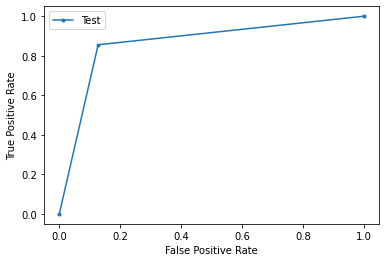

In [ ]:
fpr, tpr, thrhld = roc_curve(test.evaluation, pred)
pyplot.plot(fpr, tpr, marker='.', label='Test')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
print('ROC AUC: %f' % roc_auc_score(test.evaluation, pred))

ROC AUC: 0.864040


ТОП-15 самых позитивных и самых негативных рецензий по мнению модели

In [ ]:
proba = clf.predict_proba(test_X)

In [ ]:
top_neg = [elem[0] for elem in list(proba)]
top_pos = [elem[1] for elem in list(proba)]

In [ ]:
test['top_pos'] = list(top_pos)
test['top_neg'] = list(top_neg)

In [ ]:
test.head(10)

,text,evaluation,label,top_pos,top_neg
0,"Late one night on Tom Snyder's ""Tomorrow"" Show...",1,POS,0.986223,0.013777
1,Luc Besson's first work is also his first fora...,1,POS,0.926014,0.073986
2,This film is not only the last piece of the Th...,1,POS,0.999965,0.000035
3,See No Evil With Kane. The Movie Has a great s...,1,POS,0.969713,0.030287
4,"I throughly enjoyed this short, even as a Toro...",1,POS,0.987343,0.012657
5,... But it is also Minnie's and Pete's too! Ye...,1,POS,0.999384,0.000616
6,This scene shows how Wallace's experiment by u...,1,POS,0.031276,0.968724
7,This movie was talked about in Fangoria where ...,1,POS,0.447887,0.552113
8,exquisite!! in simple words... both Aparna Sen...,1,POS,0.998446,0.001554
9,"As an adult, I am grateful to have caught this...",1,POS,0.627026,0.372974


In [ ]:
sorted_top_pos = test.sort_values(['top_pos'], ascending=[False])
sorted_top_neg = test.sort_values(['top_neg'], ascending=[False])

In [ ]:
texts_top_pos = sorted_top_pos.head(15).text.tolist()
texts_top_neg = sorted_top_neg.head(15).text.tolist()

In [ ]:
print('ТОП-15 положительных рецензий: \n')

counter = 1
for text in texts_top_pos:
  print('%d. %s \n' % (counter, text))
  counter += 1

ТОП-15 положительных рецензий: 

1. The Hand of Death aka Countdown in Kung Fu (1976) is a vastly underrated early work by director John Woo. The film stars Dorian Tan (Tan Tao-liang) and features Jackie Chan, Sammo Hung and James Tien in significant supporting roles. Many people believe, or have been lead to believe by deceptive advertising, that this is a Jackie Chan film. This is not a Jackie Chan film, Dorian Tan is the star but Jackie gives one of his best (most serious) early performances.<br /><br />The Hand of Death is about a Shaolin disciple named Yunfei (Tan) who is sent on a mission to assassinate a Shaolin traitor named Shih Xiaofeng (Tien) and protect a revolutionary named Zhang Yi (Woo). Along his journey Yunfei meets up with a young woodcutter named Tan (Chan) and a disgraced sword fighter (Chang Chung) known as "the wanderer." Both men have suffered at the hands of Shih and want to take revenge. The three team up to defeat Shih and his eight bodyguards and escort the r

In [ ]:
print('ТОП-15 негативных рецензий: \n')

counter = 1
for text in texts_top_neg:
  print('%d. %s \n' % (counter, text))
  counter += 1

ТОП-15 негативных рецензий: 

1. La Ragazza del Vagone Letto, or Terror Express! as it was called on the version I saw, starts as various passengers board a long distance train. Three thuggish idiots, Dave, Phil & Ernie (Carlo De Mejo) board & it's clear that they're there to cause trouble as they intimidate & verbally abuse the other passengers & staff. As the train speeds along things turn nasty when a prostitute named Juliette (Silvia Dionisio) refuses to have sex with Dave, he & his mates decide to hold the entire train hostage so they can have an orgy with Juliette &, well not much else actually happens apart from some hero cop & his prisoner who set about saving the day. Erm, that's it really...<br /><br />This Italian production was directed by Ferdinando Baldi & is complete total & utter crap from start to finish. The script by George Eastman as Luigi Montefiori could just as easily be described as a really boring porno as much as a horror/thriller. It is tediously slow, it's 3

Самостоятельно написанные метрики tp, tn, fp, fn

In [ ]:
def tp(y_true, y_pred):
    tp = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
    return tp

In [ ]:
def tn(y_true, y_pred):
    tn = 0
    for i in range(len(y_true)):
        if y_true[i] == 0 and y_pred[i] == 0:
            tn += 1
    return tn

In [ ]:
def fp(y_true, y_pred):
    fp = 0
    for i in range(len(y_true)):
        if y_true[i] == 0 and y_pred[i] == 1:
            fp+=1
    return fp

In [ ]:
def fn(y_true, y_pred):
    fn = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 0:
            fn+=1
    return fn

In [ ]:
def own_accuracy(y_true, y_pred):
    return (tp(y_true, y_pred) + tn(y_true, y_pred)) / (tp(y_true, y_pred) + tn(y_true, y_pred) + 
            fp(y_true, y_pred) + fn(y_true, y_pred))

In [ ]:
def own_precision(y_true, y_pred):
    return tp(y_true, y_pred) / (tp(y_true, y_pred) + fp(y_true, y_pred))

In [ ]:
def own_recall(y_true, y_pred):
    return tp(y_true, y_pred) / (tp(y_true, y_pred) + fn(y_true, y_pred))

In [ ]:
def own_f1(y_true, y_pred):
    return 2 * own_precision(y_true, y_pred) * own_recall(y_true, y_pred) / (own_precision(y_true, y_pred) + own_recall(y_true, y_pred))

In [ ]:
own_accuracy(test.evaluation, pred)

0.86404

In [ ]:
own_recall(test.evaluation, pred)

0.8702302497762591

In [ ]:
own_f1(test.evaluation, pred)

0.8628937921019725

In [ ]:
print(own_accuracy(test.evaluation, pred) == accuracy_score(test.evaluation, pred))
print(own_recall(test.evaluation, pred) == recall_score(test.evaluation, pred))
print(own_f1(test.evaluation, pred) == f1_score(test.evaluation, pred))

True
True
True
